In [7]:
import yfinance as yf
from yahoo_fin import stock_info as si
import pandas as pd
import numpy as np
import requests, csv, json, ta
from datetime import datetime, timedelta

pd.set_option('display.max_rows', 500)

In [8]:
sp500 = si.tickers_sp500()
tickers = sp500 + ['SPY']

In [9]:
tickers_delete = []
stock_info = {}
for stock in sp500:
    try:
        # Create a Ticker object for the stock
        ticker = yf.Ticker(stock)
        stock_info[stock] = ticker.info
    except Exception as e:
        # Handle any other exceptions
        print(f"An error occurred for {stock}: {str(e)}")
        tickers_delete.append(stock)
    
    continue
    
stock_info_df = pd.DataFrame(stock_info).T.convert_dtypes()
# stock_info_df['marketCap_in_B'] = round(stock_info_df['marketCap'] / 1000000000,2)

In [240]:
sector_groups = sector_info_df.groupby('sector').groups

for sector, tickers in sector_groups.items():
    print(f"{sector}: {list(tickers)}")

Basic Materials: ['ALB', 'APD', 'CE', 'CF', 'CTVA', 'DD', 'DOW', 'ECL', 'EMN', 'FCX', 'FMC', 'IFF', 'LIN', 'LYB', 'MLM', 'MOS', 'NEM', 'NUE', 'PPG', 'SHW', 'STLD', 'VMC']
Communication Services: ['CHTR', 'CMCSA', 'DIS', 'EA', 'FOX', 'FOXA', 'GOOG', 'GOOGL', 'IPG', 'LYV', 'META', 'MTCH', 'NFLX', 'NWS', 'NWSA', 'OMC', 'PARA', 'T', 'TMUS', 'TTWO', 'VZ', 'WBD']
Consumer Cyclical: ['ABNB', 'AMCR', 'AMZN', 'APTV', 'AVY', 'AZO', 'BALL', 'BBWI', 'BBY', 'BKNG', 'BWA', 'CCL', 'CMG', 'CZR', 'DECK', 'DHI', 'DPZ', 'DRI', 'EBAY', 'ETSY', 'EXPE', 'F', 'GM', 'GPC', 'HAS', 'HD', 'HLT', 'IP', 'KMX', 'LEN', 'LKQ', 'LOW', 'LULU', 'LVS', 'MAR', 'MCD', 'MGM', 'MHK', 'NCLH', 'NKE', 'NVR', 'ORLY', 'PHM', 'PKG', 'RCL', 'RL', 'ROL', 'ROST', 'SBUX', 'TJX', 'TPR', 'TSCO', 'TSLA', 'ULTA', 'WRK', 'WYNN', 'YUM']
Consumer Defensive: ['ADM', 'BF-B', 'BG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DLTR', 'EL', 'GIS', 'HRL', 'HSY', 'K', 'KDP', 'KHC', 'KMB', 'KO', 'KR', 'KVUE', 'LW', 'MDLZ', 'MKC', 'MNST', 'MO', '

In [222]:
stock_info_df[['sector']].value_counts()

sector                
Technology                78
Industrials               72
Financial Services        66
Healthcare                64
Consumer Cyclical         57
Consumer Defensive        37
Utilities                 32
Real Estate               31
Basic Materials           22
Communication Services    22
Energy                    22
dtype: int64

In [10]:
def get_data(tickers, start_date, end_date):
    date_range = pd.date_range(start_date, end_date, freq='MS')
    prices = pd.DataFrame(index=date_range)

    for ticker in tickers:
        try:
            data = yf.download(ticker,start_date,end_date, interval='1mo')
            #print(data)
            print('fetched data for {0} from {1} to {2}'.format(ticker, data.index.min(), data.index.max()))
            data.rename(columns={'Adj Close': ticker}, inplace=True)
            data = data[[ticker]]
            # data = data.rename(columns = {'Adj Close': ticker})[ticker]
            prices = prices.join(data)
            # prices = prices.dropna()
            #tickers_got.append(ticker)
         
        except Exception as e:
        # Handle any other exceptions
            print(f"An error occurred for {ticker}: {str(e)}")
            #tickers_delete.append(ticker)
    
    # display(prices)    
    return prices

In [11]:
data = get_data(tickers,'2014-06-01', '2024-07-01') 
data = data.drop(index=data.index[-1])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for A from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AAL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AAPL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ABBV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ABNB from 2020-12-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ABT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ACGL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ACN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ADBE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ADI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for ADM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ADP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ADSK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for AEE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AEP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AES from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AFL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AIG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AIZ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AJG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AKAM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ALB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ALGN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ALL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ALLE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AMAT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AMCR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AMD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AME from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AMGN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AMP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AMT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AMZN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ANET from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ANSS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AON from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AOS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for APA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for APD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for APH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for APTV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ARE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ATO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AVB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AVGO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AVY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AWK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AXON from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for AXP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for AZO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BAC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BALL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BAX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BBWI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BBY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BDX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BEN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BF-B from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BIIB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BIO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BKNG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BKR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BLDR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for BLK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BMY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BRK-B from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BRO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BSX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BWA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for BX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for BXP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for C from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CAG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CAH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CARR from 2020-03-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CAT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CBOE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CBRE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CCI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CCL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CDNS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CDW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CEG from 2022-01-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CF from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CFG from 2014-09-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CHD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CHRW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CHTR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CINF from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CLX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CMCSA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CME from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CMG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for CMI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CMS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CNC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CNP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for COF from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for COO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for COP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for COR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for COST from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CPAY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CPB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CPRT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CPT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CRL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CRM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CRWD from 2019-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CSCO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CSGP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CSX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CTAS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CTLT from 2014-07-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CTRA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CTSH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CTVA from 2019-05-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CVS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for CVX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for CZR from 2014-09-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for D from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DAL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for DAY from 2018-04-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DECK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DFS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DGX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DHI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DHR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DIS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DLR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DLTR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DOC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DOV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DOW from 2019-03-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DPZ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DRI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DTE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DUK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DVA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for DVN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for DXCM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EBAY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ECL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ED from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EFX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EIX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ELV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EMN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EMR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for ENPH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EOG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EPAM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EQIX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EQR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for EQT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ES from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ESS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ETN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ETR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ETSY from 2015-04-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EVRG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for EW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EXC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EXPD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for EXPE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for EXR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for F from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FANG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FAST from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FCX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FDS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FDX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FFIV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for FI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FICO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FIS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FITB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FMC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FOX from 2019-03-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FOXA from 2019-03-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FRT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FSLR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for FTNT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for FTV from 2016-07-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for GDDY from 2015-03-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GEHC from 2022-12-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GEN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GEV from 2024-04-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GILD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

fetched data for GIS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00



[*********************100%%**********************]  1 of 1 completed


fetched data for GL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GLW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GNRC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GOOG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GOOGL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GPC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GPN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GRMN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for GS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for GWW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HAL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for HAS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HBAN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HCA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HES from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HIG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HII from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HLT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HOLX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HON from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HPE from 2015-10-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for HPQ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HRL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HSIC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HST from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HSY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for HUBB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for HUM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for HWM from 2016-11-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IBM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ICE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IDXX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for IEX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IFF from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for INCY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for INTC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for INTU from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for INVH from 2017-02-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for IPG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IQV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for IR from 2017-05-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IRM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ISRG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ITW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for IVZ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for J from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for JBHT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for JBL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for JCI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for JKHY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for JNJ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for JNPR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for JPM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for K from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for KDP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for KEY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for KEYS from 2014-10-01 00:00:00 to 2024-06-01 00:00:00
fetched data for KHC from 2015-07-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for KIM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for KKR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for KLAC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for KMB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for KMI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for KMX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for KO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for KR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for KVUE from 2023-05-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for L from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LDOS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LEN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LHX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LIN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LKQ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LLY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LMT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LNT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LOW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LRCX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for LULU from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LUV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LVS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LW from 2016-11-01 00:00:00 to 2024-06-01 00:00:00
fetched data for LYB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for LYV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MAA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MAR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for MAS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MCD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MCHP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MCK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MCO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MDLZ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MDT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MET from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for META from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MGM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MHK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MKC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MKTX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MLM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MMC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MMM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MNST from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MOH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MOS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MPC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MPWR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MRK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for MRNA from 2018-12-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MRO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MSCI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MSFT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MSI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MTB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MTCH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for MTD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for MU from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NCLH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NDAQ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NDSN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NEE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NEM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NFLX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NKE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NOC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NOW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NRG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NSC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NTAP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NTRS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NUE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for NVDA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for NVR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for NWS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for NWSA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for NXPI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for O from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ODFL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for OKE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for OMC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ON from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ORCL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ORLY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for OTIS from 2020-03-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for OXY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PANW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PARA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PAYC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PAYX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PCAR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PCG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PEG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PEP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PFE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for PFG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for PG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PGR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PHM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PKG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PLD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PNC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PNR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PNW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PODD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for POOL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PPG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PPL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PRU from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PSA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PSX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PTC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for PWR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for PYPL from 2015-07-01 00:00:00 to 2024-06-01 00:00:00
fetched data for QCOM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for QRVO from 2015-01-01 00:00:00 to 2024-06-01 00:00:00
fetched data for RCL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for REG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for REGN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for RF from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for RJF from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for RL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for RMD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ROK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ROL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ROP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ROST from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for RSG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for RTX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for RVTY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SBAC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SBUX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SCHW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SHW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SJM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SLB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SMCI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SNA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SNPS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SOLV from 2024-04-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SPG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SPGI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SRE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for STE from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for STLD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for STT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for STX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for STZ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SWK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SWKS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SYF from 2014-07-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for SYK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for SYY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for T from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TAP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TDG from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TDY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TECH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TEL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TER from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TFC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TFX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TGT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TJX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TMO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TMUS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TPR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TRGP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TRMB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TROW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TRV from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TSCO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TSLA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TSN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TTWO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TXN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for TXT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for TYL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for UAL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for UBER from 2019-05-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for UDR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for UHS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ULTA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for UNH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for UNP from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for UPS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for URI from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for USB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for V from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for VICI from 2018-01-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for VLO from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for VLTO from 2023-10-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for VMC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for VRSK from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for VRSN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for VRTX from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for VST from 2016-10-01 00:00:00 to 2024-06-01 00:00:00
fetched data for VTR from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for VTRS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for VZ from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WAB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WAT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WBA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WBD from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WDC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WEC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for WELL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WFC from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WMB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WMT from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WRB from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WRK from 2015-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WST from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WTW from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for WY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for WYNN from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


fetched data for XEL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for XOM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for XYL from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for YUM from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ZBH from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


fetched data for ZBRA from 2014-06-01 00:00:00 to 2024-06-01 00:00:00
fetched data for ZTS from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


[*********************100%%**********************]  1 of 1 completed

fetched data for SPY from 2014-06-01 00:00:00 to 2024-06-01 00:00:00


In [12]:
def get_daily_returns(data):
    data = (data/data.shift(1)) -1
    data.iloc[0,:]= 0
    return data

In [13]:
monthly_rets =  get_daily_returns(data)

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,SPY
2014-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-07-01,-0.021269,-0.095670,0.028731,-0.072643,NaN,0.029829,-0.069464,-0.019297,-0.042980,-0.082116,...,-0.053490,0.027173,-0.035003,-0.017283,-0.096980,-0.145320,-0.034391,-0.027332,0.019833,-0.008710
2014-08-01,0.019077,0.003309,0.072176,0.064183,NaN,0.008228,0.039850,0.022452,0.038267,0.030022,...,0.083972,-0.095310,0.040584,0.005256,0.055823,0.048373,-0.007594,-0.025478,0.076876,0.039463
2014-09-01,-0.003149,-0.087448,-0.012184,0.044862,NaN,-0.015388,-0.015473,0.003207,-0.037691,-0.031886,...,-0.053554,-0.023819,-0.051482,-0.047806,-0.047504,-0.006213,0.012486,-0.090478,0.044840,-0.018385
2014-10-01,-0.027579,0.165445,0.071960,0.098684,NaN,0.048089,0.029240,-0.002459,0.013441,0.010009,...,0.062774,0.015662,0.111631,0.028283,0.027998,-0.002084,0.108768,0.039171,0.005683,0.028335
2014-11-01,0.080871,0.176586,0.101204,0.098585,NaN,0.026530,0.017756,0.078670,0.050770,0.101169,...,0.051760,-0.059997,0.014042,-0.063799,0.058289,0.081998,0.009439,-0.008136,0.209096,0.027472
2014-12-01,-0.042115,0.105090,-0.067866,-0.054335,NaN,0.011458,0.031054,0.034519,-0.013301,0.016105,...,0.016426,-0.155307,0.058338,0.028468,-0.007043,-0.056958,0.010063,0.058237,-0.040429,-0.008012
2015-01-01,-0.077430,-0.084841,0.061424,-0.077781,NaN,-0.005775,-0.019120,-0.059120,-0.035351,-0.055087,...,-0.001114,-0.005445,0.053689,-0.054408,-0.104281,-0.007824,-0.009660,0.078155,-0.006972,-0.024274
2015-02-01,0.120290,-0.024042,0.096449,0.010011,NaN,0.063913,0.020528,0.071403,0.127905,0.123393,...,-0.020642,-0.036837,-0.059952,0.012812,0.046921,0.128536,0.073952,0.090942,0.080661,0.056205
2015-03-01,-0.015636,0.104111,-0.027549,-0.032397,NaN,-0.021955,0.041244,0.040653,-0.065234,0.083458,...,-0.047968,-0.107979,-0.013322,-0.032756,-0.015148,-0.029466,-0.023839,-0.003624,0.004339,-0.020080


In [37]:
monthly_rets = monthly_rets.fillna(0)
monthly_rets = monthly_rets.drop(index=data.index[0])

In [38]:
returns_data = monthly_rets.drop('SPY', axis=1)

In [39]:
sector_info_df = stock_info_df[['sector']]

In [40]:
returns_data.columns = pd.MultiIndex.from_tuples([(sector_info_df.loc[ticker, 'sector'], ticker) for ticker in returns_data.columns], names=['sector', 'Ticker'])

In [42]:
sector_returns = returns_data.groupby(level='sector', axis=1).mean()

In [43]:
spy = monthly_rets[['SPY']]

In [44]:
all_data = sector_returns.join(spy)
all_data

,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,SPY
2014-07-01,-0.013858,-0.004160,-0.021408,-0.033982,-0.032127,-0.016853,0.001798,-0.032980,0.004092,-0.016516,-0.062249,-0.008710
2014-08-01,0.039331,0.017420,0.046944,0.060517,0.040444,0.041726,0.041097,0.046116,0.033231,0.055640,0.044055,0.039463
2014-09-01,-0.036628,-0.026055,-0.012104,0.006954,-0.070985,-0.006183,-0.010117,-0.022813,-0.047809,-0.015805,-0.022327,-0.018385
2014-10-01,-0.023020,0.009474,0.041416,0.033244,-0.048323,0.029733,0.069208,0.049493,0.091910,0.026104,0.079975,0.028335
2014-11-01,0.006981,0.011689,0.057743,0.053025,-0.074185,0.025422,0.043633,0.030992,0.032929,0.046878,0.008550,0.027472
2014-12-01,-0.015199,-0.010214,0.008425,-0.006872,-0.013689,0.017051,0.003812,0.011477,0.001706,0.008017,0.032201,-0.008012
2015-01-01,-0.013543,-0.001922,-0.024999,0.000144,-0.028268,-0.057921,0.005781,-0.030200,0.062943,-0.030698,0.020915,-0.024274
2015-02-01,0.098181,0.080480,0.072203,0.041666,0.063749,0.066046,0.055393,0.053767,-0.024848,0.093320,-0.057144,0.056205
2015-03-01,-0.036642,-0.017726,0.005523,-0.003945,-0.002822,0.001488,0.032500,-0.005547,0.015106,-0.014263,-0.001953,-0.020080
2015-04-01,0.055236,0.017316,-0.007830,-0.012722,0.072941,0.007296,-0.022821,0.009446,-0.033221,-0.001208,-0.004485,0.014341


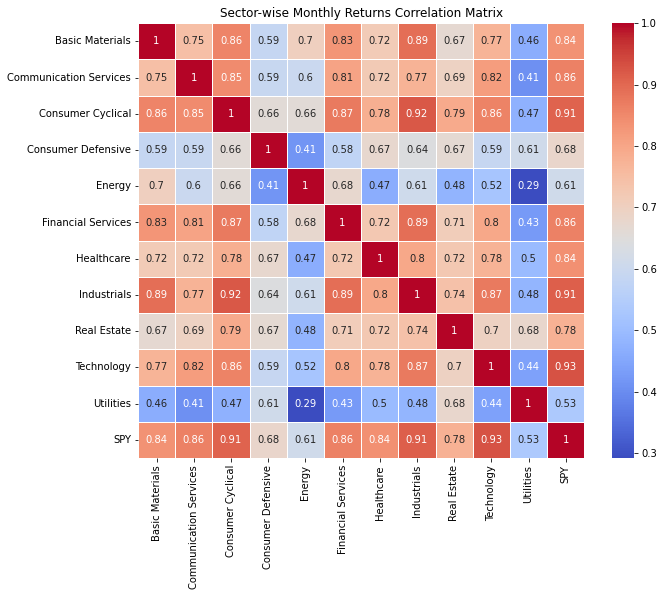

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Sector-wise Monthly Returns Correlation Matrix')
plt.show()

In [53]:
tech_all = returns_data['Technology']


tech_sector = sector_returns[['Technology']]

In [54]:
tech = tech_all.join(tech_sector)

In [55]:
tech

,AAPL,ACN,ADBE,ADI,ADSK,AKAM,AMAT,AMD,ANET,ANSS,...,TEL,TER,TRMB,TXN,TYL,UBER,VRSN,WDC,ZBRA,Technology
2014-07-01,0.028731,-0.019297,-0.042980,-0.082116,-0.053743,-0.033410,-0.070510,-0.066826,0.059785,0.014772,...,0.000809,-0.070408,-0.163735,-0.032224,-0.005263,0.000000,0.107355,0.087030,-0.027332,-0.016516
2014-08-01,0.072176,0.022452,0.038267,0.030022,0.005436,0.023721,0.102576,0.066496,0.268149,0.056668,...,0.012764,0.130077,0.076375,0.048372,-0.018406,0.000000,0.056059,0.031234,-0.025478,0.055640
2014-09-01,-0.012184,0.003207,-0.037691,-0.031886,0.027218,-0.010261,-0.060656,-0.182254,0.053429,-0.069250,...,-0.113819,-0.058281,-0.082983,-0.010170,-0.007411,0.000000,-0.034338,-0.055237,-0.090478,-0.015805
2014-10-01,0.071960,-0.002459,0.013441,0.010009,0.044283,0.008361,0.022212,-0.178886,-0.080154,0.038192,...,0.105625,-0.048281,-0.119344,0.041308,0.266063,0.000000,0.084180,0.010789,0.039171,0.026104
2014-11-01,0.101204,0.078670,0.050770,0.101169,0.077511,0.071476,0.088728,-0.003571,-0.066215,0.063136,...,0.050221,0.078805,0.047282,0.103588,-0.029843,0.000000,0.005689,0.054145,-0.008136,0.046878
2014-12-01,-0.067866,0.034519,-0.013301,0.016105,-0.031290,-0.025538,0.040804,-0.043011,-0.199157,-0.018199,...,-0.010290,-0.003023,-0.056523,-0.017457,0.007920,0.000000,-0.051581,0.071947,0.058237,0.008017
2015-01-01,0.061424,-0.059120,-0.035351,-0.055087,-0.100733,-0.076239,-0.083467,-0.037453,0.038841,-0.016220,...,0.049644,-0.082624,-0.101733,-0.000374,-0.030702,0.000000,-0.044211,-0.118561,0.078155,-0.030698
2015-02-01,0.096449,0.071403,0.127905,0.123393,0.189409,0.195151,0.096760,0.210117,0.096483,0.065700,...,0.086459,0.067403,0.096476,0.106958,0.125283,0.000000,0.175110,0.104650,0.090942,0.093320
2015-03-01,-0.027549,0.040653,-0.065234,0.083458,-0.087173,0.022155,-0.095655,-0.138264,0.019072,0.025823,...,-0.003049,-0.021391,-0.035960,-0.027381,0.009718,0.000000,0.046079,-0.149281,-0.003624,-0.014263
2015-04-01,0.005786,-0.011100,0.028672,-0.018413,-0.030866,0.038424,-0.122784,-0.156716,-0.092443,-0.026647,...,-0.070790,-0.031830,0.009127,-0.052107,0.011781,0.000000,-0.051665,0.079758,0.014991,-0.001208


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(tech.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Sector-wise Monthly Returns Correlation Matrix')
plt.show()